In [3]:
import hist
import uproot
import vector
from math import pi
import numpy as np
import awkward as ak
import mplhep as hep
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import matplotlib.pyplot as plt

In [4]:
spin_corr = uproot.open('/home/he614/phys324/minitree_total_SM.root')

In [5]:
spin_corr.keys()

['hist_0;1', 'Step0;1', 'hist;1', 'Step7;1', 'Step8;1', 'Spin_Corr;1']

In [6]:
spin_corr_data = spin_corr['Spin_Corr']['ll_cHel'].array()

In [7]:
spin_corr_data

<Array [0.0613, 0.345, -0.55, ..., -0.0541, -0.303] type='1374600 * float64'>

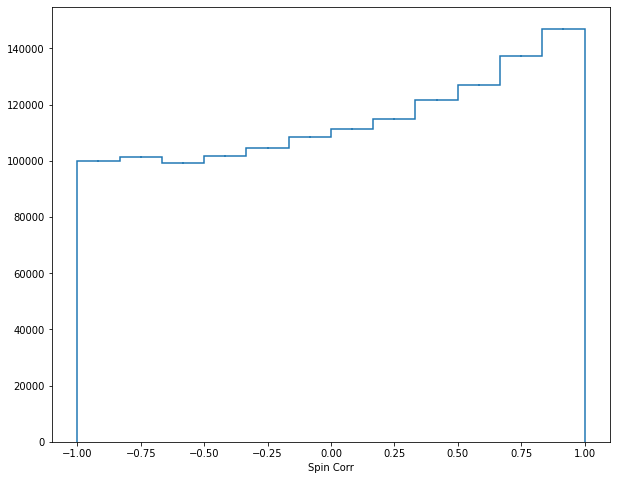

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))

spin_corr_plot = hist.Hist(hist.axis.Regular(12, -1, 1, overflow=False, underflow=False, name="Spin Corr"), storage=hist.storage.Weight())
spin_corr_plot.fill(spin_corr_data);
hep.histplot(spin_corr_plot);
#plt.title("Example: Top Quark $p_T$ in Lab Frame")

In [9]:
type(spin_corr_data)

awkward.highlevel.Array

In [10]:
def line(x, a, b):
    return a*x+b

In [11]:
x_linspace = np.linspace(-1, 1, 12)
spin_corr_vals = spin_corr_plot.values()
sc_trapz = np.trapz(spin_corr_vals)
spin_corr_norm_plot = (spin_corr_plot/spin_corr_plot.axes[0].widths)/sc_trapz
sc_data_norms_vals = spin_corr_norm_plot.values()

Text(0.5, 1.0, 'Bottom Quark $p_T$ with linear regression')

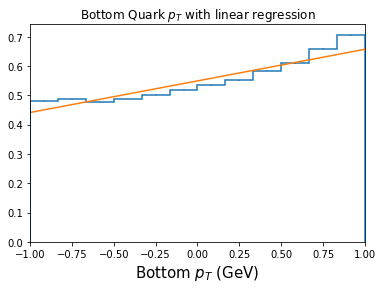

In [12]:
pars, errors = curve_fit(line, x_linspace, sc_data_norms_vals, p0 = [4000, 11000])
liny = np.asarray(line(x_linspace, pars[0], pars[1]))
hep.histplot(spin_corr_norm_plot);
plt.plot(x_linspace, liny);
plt.xlim(-1, 1)
#plt.ylim(0,8000)
plt.xlabel("Bottom $p_T$ (GeV)", fontsize = 15)
plt.title("Bottom Quark $p_T$ with linear regression")

In [13]:
area = np.trapz(spin_corr_norm_plot)
print(area)

WeightedSum(value=6, variance=1.43867e-05)


In [14]:
scnp2 = spin_corr_norm_plot.density()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6d34021dc0>, errorbar=None, legend_artist=None)]

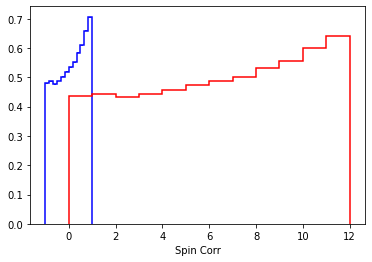

In [15]:
hep.histplot(spin_corr_norm_plot, color = 'blue');
hep.histplot(scnp2, color = 'r')
#plt.plot(x_linspace, liny);

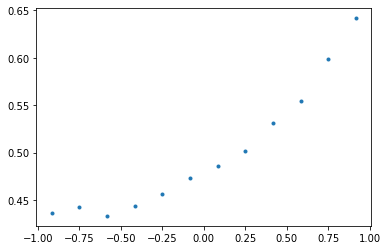

In [16]:
ar = plt.errorbar(spin_corr_plot.axes[0].centers, scnp2, fmt = ".")

In [17]:
print("Slope: {:.5f}".format(pars[0]))

Slope: 0.10784


In [18]:
print("Y-int: {:.5f}".format(pars[1]))

Y-int: 0.54933


In [19]:
print("D (Fit Calculation): {:.5f}".format(-(2 * pars[0])))

D (Fit Calculation): -0.21568


In [20]:
pos = len(spin_corr_data[spin_corr_data > 0])
neg = len(spin_corr_data[spin_corr_data < 0])
Alab = (pos - neg) / (pos + neg)

In [21]:
print("D (Symmetry Calculation): {:.5f}".format(-(2 * Alab)))

D (Symmetry Calculation): -0.20953


In [22]:
Cij_corr = spin_corr['Spin_Corr']['c_kn'].array()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6d33f01be0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

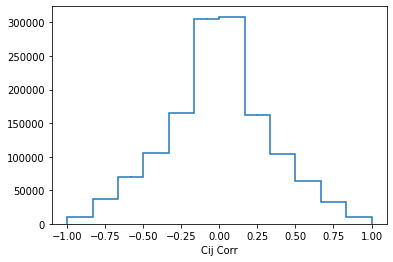

In [23]:
Cij_plot = hist.Hist(hist.axis.Regular(12, -1, 1, overflow=False, underflow=False, name="Cij Corr"), storage=hist.storage.Weight())
Cij_plot.fill(Cij_corr);
hep.histplot(Cij_plot)

In [24]:
def xlogx(x, a, b):
    

IndentationError: expected an indented block (3280040035.py, line 2)

In [25]:
second_spin_corr = uproot.open('/home/he614/phys324/susy_minitree_100.root')

In [29]:
second_spin_corr.keys()

['Step8;1', 'Nevents;1']

In [58]:
lpt_sus_data = second_spin_corr['Step8']['l_pt'].array()

In [59]:
lpt_sus_data

<Array [38.4, 64.3, 26.1, 47.3, ..., 145, 35, 75.9, 119] type='4735 * float32'>

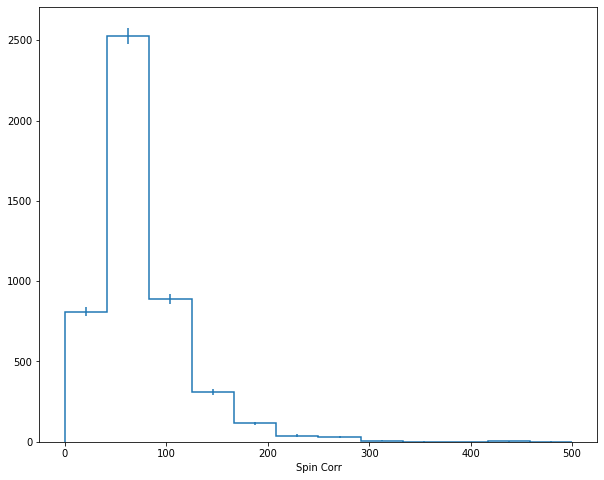

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))

lpt_sus_plot = hist.Hist(hist.axis.Regular(12, 0, 500, overflow=False, underflow=False, name="Spin Corr"), storage=hist.storage.Weight())
lpt_sus_plot.fill(lpt_sus_data);
hep.histplot(lpt_sus_plot);

In [55]:
h_sm_lep_pt = spin_corr['Step8']['lep_pt'].array()[0:10000]

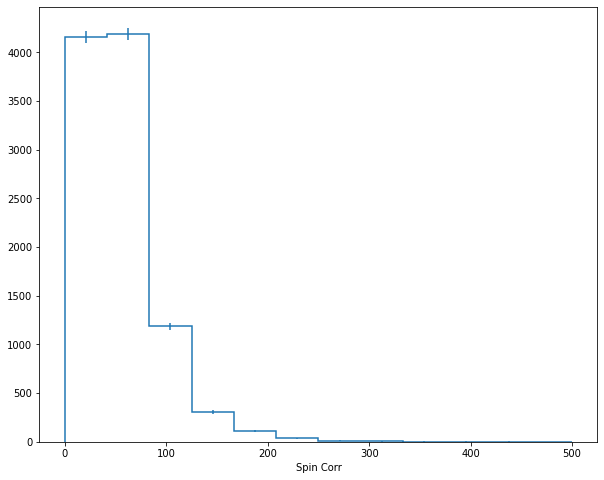

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))

h_sm_lep_pt_plot = hist.Hist(hist.axis.Regular(12, 0, 500, overflow=False, underflow=False, name="Spin Corr"), storage=hist.storage.Weight())
h_sm_lep_pt_plot.fill(h_sm_lep_pt);
hep.histplot(h_sm_lep_pt_plot);

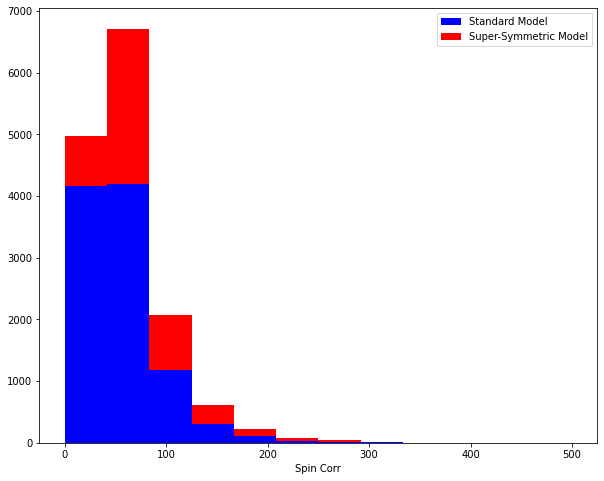

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))

hep.histplot(
    [h_sm_lep_pt_plot, lpt_sus_plot],
    histtype='fill',
    color=['blue', 'red'],
    stack=True,
    label=['Standard Model', 'Super-Symmetric Model'],
    ax=ax
    # options..
)
plt.legend()
plt.show()

In [64]:
leta_sus_data = second_spin_corr['Step8']['l_eta']

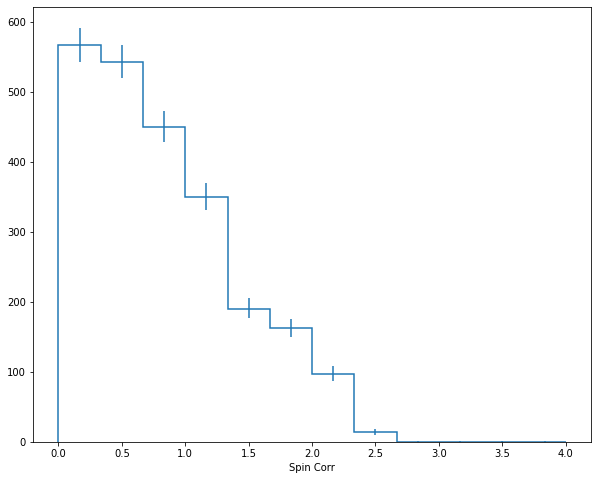

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))

leta_sus_plot = hist.Hist(hist.axis.Regular(12, 0, 4, overflow=False, underflow=False, name="Spin Corr"), storage=hist.storage.Weight())
leta_sus_plot.fill(leta_sus_data);
hep.histplot(leta_sus_plot);

In [72]:
h_sm_lep_eta = spin_corr['Step8']['lep_eta'].array()[0:10000]

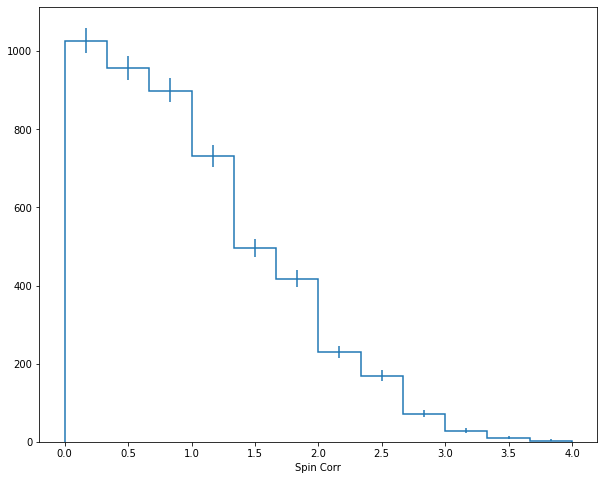

In [78]:
fig, ax = plt.subplots(figsize=(10, 8))

h_sm_lep_eta_plot = hist.Hist(hist.axis.Regular(12, 0, 4, overflow=False, underflow=False, name="Spin Corr"), storage=hist.storage.Weight())
h_sm_lep_eta_plot.fill(h_sm_lep_eta);
hep.histplot(h_sm_lep_eta_plot);